## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [1]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


 a : 4.05xc: 33.64944394971482 yc: 35.4375 minimum index : [414,451] minimum : 1.5377343749999917I0 = 451


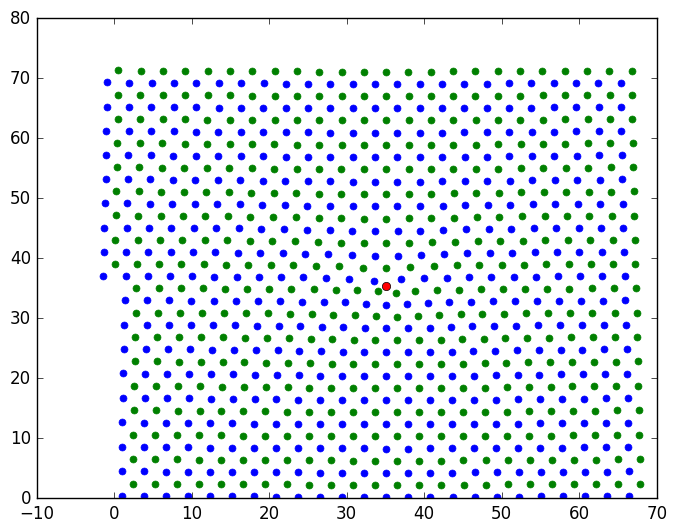

X12[I0] = [34.3654,36.45]
xcore = [35.0813,35.4375]


3-element Array{Float64,1}:
 35.0813
 35.4375
  0.0   

In [2]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 10.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
xP, yP, zP = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore

 a : 4.05

xc: 434.57898888248735 yc: 436.3875 minimum index : [65448,65881] minimum : 1.5377343749999222I0 = 65881
X12[I0] = [435.295,437.4]
xcore = [436.011,436.387]


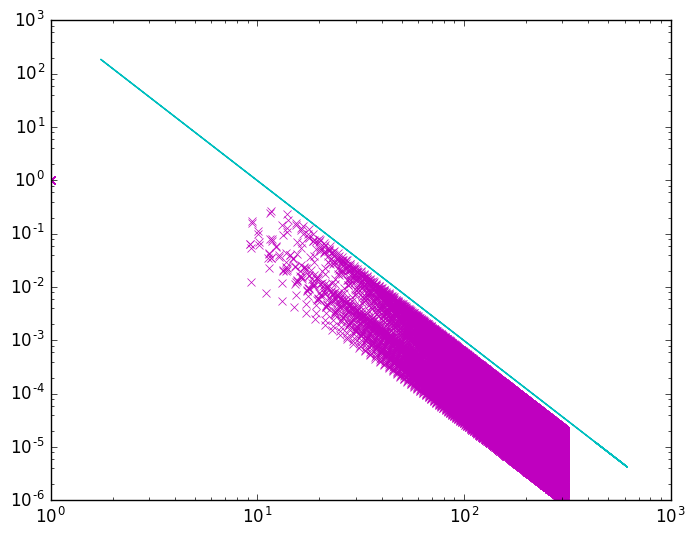

count : 50059

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3229a1290>

In [5]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 150.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=10)
#plot(x[I1], y[I1], "g.", markersize=10)
#plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
xP, yP, zP = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
nu = length(f)
pip = zeros(nu,1)
inner = ones(nu)
inner_force = ones(nu)
count = 1
for i=1:nu
    pip[i,1] = norm([xP[i];yP[i]]-[xcore[1]; xcore[2]])
    if  (-7.15 > yP[i]-xcore[2] || 7.15 < yP[i]-xcore[2]) && norm([xP[i];yP[i]]-[xcore[1]; xcore[2]]) < maximum(r)/2
        #print(" here ")
        #print(xP[i]-xcore[1])
        inner[count] =r[i]
        inner_force[count]= norm(F[i])#f[i]
        #print(" force :")
        #print(F[i])
        count = count +1
    end
end
print("count : ")
print(count)
ITEST = find(log(pip[:,1]) .> 1.0)
v = x[ITEST]
u = y[ITEST]
#fTest = [norm(F(i)) for i in ITEST]
#plot(x[ITEST], y[ITEST], "b.", markersize=10)
y = r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = 1000*r.^(-3)  #plot line of slope three
#loglog(pip,f, "mx")
loglog(inner,inner_force, "mx")
#loglog(r,f, "ro")
# loglog(r,y, "g-")
# loglog(r,z, "b-")
loglog(r,w, "c-")

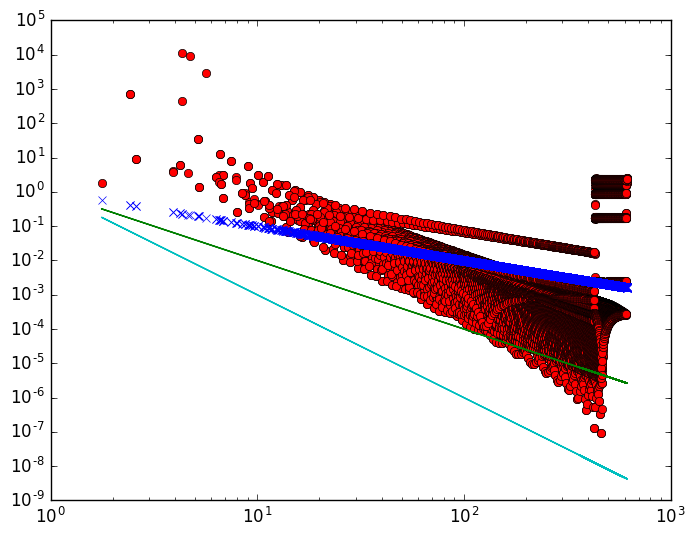

[0.0,0.0,0.0]

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa51ba67b10>

In [57]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations.fcc_edge_geom("Al", 150.1, truncate=false, cle=:isotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=10)
#plot(x[I1], y[I1], "g.", markersize=10)
#plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
y = r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = r.^(-3)  #plot line of slope three
loglog(r,f, "ro")
loglog(r,y, "g-")
loglog(r,z, "bx")
loglog(r,w, "c-")

In [26]:
# next we need to check the implementation of the elastic constants 
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
;

In [43]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
atu = set_pbc!(bulk("Al", cubic=true) * 2, true)
set_calculator!(atu, lennardjones(r0=rnn("Al")))
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = round(El.voigt_moduli(atu), 3)
Cvoigt

6×6 Array{Float64,2}:
  6.479   3.227   3.227  -0.0     0.0    -0.0  
  3.227   6.479   3.227  -0.0    -0.0     0.0  
  3.227   3.227   6.479  -0.0     0.0    -0.0  
  0.0    -0.0    -0.0     4.212  -0.0    -0.0  
  0.0     0.0     0.0    -0.0     4.212   0.0  
 -0.0    -0.0    -0.0    -0.0     0.0     4.212

[0.0,0.0,0.0]

[292.106,294.58]-

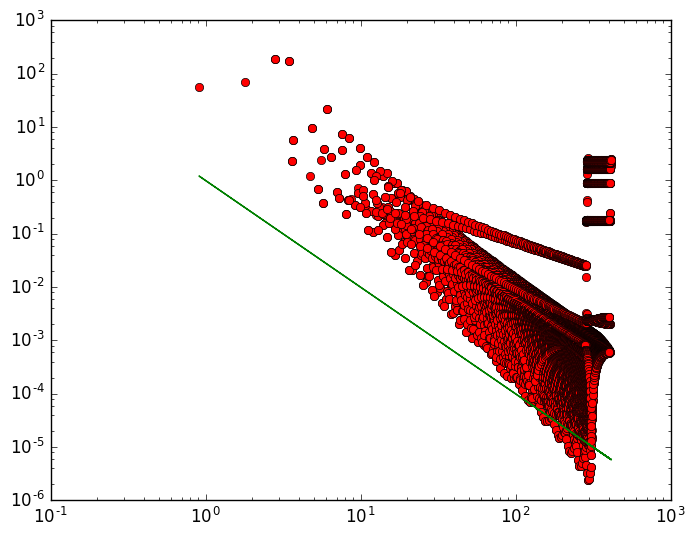

12.052428608517774

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa51eede590>

In [22]:
reload("MaterialsScienceTools")
at, xcore = MaterialsScienceTools.Dislocations.fcc_edge_geom("Al", 100.1, truncate=false, cle=:isotropic, ν=0.25)
X = positions(at) |> mat
print(xcore)
set_calculator!(at, lennardjones(r0=rnn("Al")))
xcore = [xcore[1],xcore[2],0]
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
y = r.^(-2)
z = r.^(-1)
print(log(y[1]))
#z = r[5:22]
#w = f[5:22]
#(log(w[5])-log(w[1]))/(log(z[5])-log(z[1]))
loglog(r,f, "ro")
loglog(r,y, "g-")

In [28]:
# check how far we are from anisotropy: pretty far actually 
println((Cvoigt[1,1] - Cvoigt[1,2]) / 2)
println("for isotropy, this number should match Cvoigt[6,6] = ", Cvoigt[6,6])

1.6260000000000001
for isotropy, this number should match Cvoigt[6,6] = 4.212


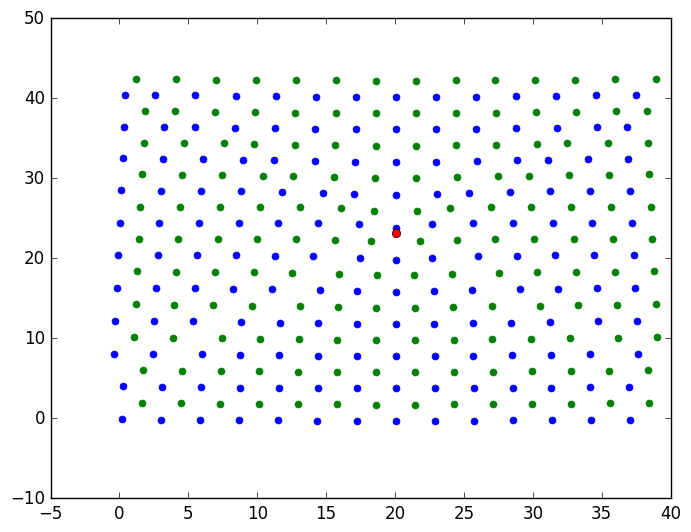

[0.0,0.0,0.0][9.06513 3.22679 0.640383 5.09541e-12 2.31394e-11 9.04038e-12; 3.22679 6.47872 3.22679 -2.50376e-11 1.85895e-11 1.95123e-11; 0.640383 3.22679 9.06513 9.85372e-12 1.6125e-11 4.03481e-12; 2.35332e-11 1.62144e-11 3.39497e-11 4.21237 3.6741e-11 -1.52075e-11; 1.3955e-11 1.9744e-11 1.37901e-11 2.49922e-11 1.62596 3.19824e-11; 1.82787e-11 5.05893e-11 1.67756e-11 3.24701e-12 2.4988e-11 4.21237](λ,ϕ) = (1.0876050097921104,0.952133921711523)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f73f256b750>

In [3]:
reload("MaterialsScienceTools")
Dis = MaterialsScienceTools.Dislocations
calc = lennardjones(r0=rnn("Al"))
at, xcore = Dis.fcc_edge_geom("Al", 5.1, truncate=false, cle=:anisotropic, calc=calc, TOL=1e-4)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")

In [8]:
reload("MaterialsScienceTools")
Cv = copy(Cvoigt)
Cv[2,2] = Cv[3,3] = Cv[1,1]
Cv[1,3] = Cv[2,3] = Cv[1,2]
Cv[4,4] = Cv[5,5] = Cv[6,6] = (Cv[1,1] - Cv[1,2])/2

1.6260000000000001

In [9]:
MaterialsScienceTools.Dislocations.u_edge([], [], 1.0, Cv)

10.82(λ,ϕ) = (1.0,1.1890457085836792)


LoadError: LoadError: MethodError: no method matching atan(::Array{Any,1})
Closest candidates are:
  atan(!Matched::BigFloat) at mpfr.jl:610
  atan(!Matched::Complex{Float16}) at math.jl:480
  atan(!Matched::Float16) at math.jl:479
  ...
while loading In[9], in expression starting on line 1